In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Files/UNIVAQ_codes/Advance_ML_Techniques/mlp-algo/')
!ls

dario  img  LICENSE  mlp.ipynb	README.md  report_mlp.html  report_mlp.ipynb


# Introduction

# Import Files

In [5]:
caravan = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Caravan.csv').drop(columns = 'Unnamed: 0')
caravan.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
caravan.sample(3)

,mostype,maanthui,mgemomv,mgemleef,moshoofd,mgodrk,mgodpr,mgodov,mgodge,mrelge,...,apersong,agezong,awaoreg,abrand,azeilpl,aplezier,afiets,ainboed,abystand,purchase
2950,33,1,2,4,8,0,5,2,2,9,...,0,0,0,0,0,0,0,0,0,No
3028,3,1,1,4,1,3,4,0,3,5,...,0,0,0,1,0,0,0,0,1,Yes
4193,33,1,3,3,8,0,6,1,2,6,...,0,0,0,1,0,0,0,0,0,No


In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
colnames = [ 'lettr', 'x_box', 'y_box', 'width', 'high', 'onpix',
            'x_bar', 'y_bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr',
            'xy2br', 'x_ege', 'xegvy', 'y_ege', 'yegvx']
let = pd.read_csv( url, names = colnames, header = None)
let.sample(3)

,lettr,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
15313,N,1,0,2,1,0,7,7,11,0,5,6,8,4,8,0,8
14702,Y,5,6,5,4,3,4,9,1,7,10,10,6,1,10,2,4
8731,Y,4,5,5,4,2,4,11,2,7,11,10,5,1,11,3,4


In [24]:
let.shape

(20000, 17)

## Letters

## Report DataFrame

In [50]:
classification_out_letters = {'Accordion':[],'Hourglass':[]}

## Accordion MLP - Replacing with np.nan in every sample.

In [25]:
let_new = []
k = len(let.columns)

for i in range(1, k):
    ds_new = let.copy()
    ds_new.iloc[:, i] = np.nan
    let_new.append(ds_new)
    
let_new = pd.concat(let_new)

let_new.reset_index(inplace=True)

let_new.drop(columns='index', inplace=True)

In [12]:
let_new.sample(4)

,lettr,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
131310,B,3.0,5.0,5.0,4.0,3.0,9.0,NaN,2.0,6.0,11.0,4.0,7.0,4.0,6.0,5.0,9.0
107313,O,5.0,8.0,7.0,6.0,4.0,NaN,5.0,8.0,5.0,6.0,4.0,5.0,4.0,8.0,4.0,8.0
97174,O,5.0,10.0,6.0,7.0,NaN,8.0,8.0,9.0,8.0,7.0,7.0,8.0,3.0,8.0,4.0,8.0
232565,Y,10.0,10.0,8.0,14.0,6.0,9.0,6.0,5.0,5.0,4.0,12.0,NaN,5.0,10.0,6.0,7.0


In [28]:
for col in let_new.columns[1:]:
    let_new[col].fillna(int(let_new[col].mean()), inplace=True)
let_new.head(2)

,lettr,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,4.0,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,I,4.0,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0


In [30]:
# let_new.isna().sum()

In [31]:
let_y = let_new['lettr']
let_X = let_new.drop(columns = 'lettr')

In [32]:
y = let_y.copy()
X = let_X.copy()

# scale the data by standardization
X = StandardScaler().fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify = y 
    )

In [34]:
X_train.shape, X_test.shape 

((256000, 16), (64000, 16))

### Train MLP model

In [43]:
mlp_accordion = MLPClassifier(hidden_layer_sizes = (32,64,128,64,32,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_accordion

MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [44]:
mlp_accordion.fit(X_train, y_train)

Iteration 1, loss = 0.89915460
Iteration 2, loss = 0.44338470
Iteration 3, loss = 0.33821103
Iteration 4, loss = 0.28599423
Iteration 5, loss = 0.25158506
Iteration 6, loss = 0.22714145
Iteration 7, loss = 0.20664444
Iteration 8, loss = 0.19114971
Iteration 9, loss = 0.17853353
Iteration 10, loss = 0.16759322


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [45]:
pred_mlp = mlp_accordion.predict(X_test)

### Accuracy

In [47]:
mlp_accordion_pred = accuracy_score(pred_mlp, y_test)
mlp_accordion_pred

0.9428125

In [51]:
classification_out_letters['Accordion'].append(mlp_accordion_pred)

## MLP Hour-Glass

In [55]:
mlp_hr_glass = MLPClassifier(hidden_layer_sizes = (64,32,16,32,64,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_hr_glass

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [56]:
mlp_hr_glass.fit(X_train, y_train)

Iteration 1, loss = 1.02809947
Iteration 2, loss = 0.54090953
Iteration 3, loss = 0.44270536
Iteration 4, loss = 0.38981410
Iteration 5, loss = 0.35583799
Iteration 6, loss = 0.33111326
Iteration 7, loss = 0.31252232
Iteration 8, loss = 0.29495544
Iteration 9, loss = 0.28181370
Iteration 10, loss = 0.27197184


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [58]:
pred_mlp = mlp_hr_glass.predict(X_test)

### Accuracy

In [59]:
pred_mlp_hour_glass = accuracy_score(pred_mlp, y_test)
pred_mlp_hour_glass

0.914375

In [60]:
classification_out_letters['Hourglass'].append(pred_mlp_hour_glass)

## Accordion MLP - Replacing with zero (0) vector in every sample.

In [61]:
let_new = []
k = len(let.columns)

for i in range(1, k):
    ds_new = let.copy()
    ds_new.iloc[:, i] = 0
    let_new.append(ds_new)
    
let_new = pd.concat(let_new)

let_new.reset_index(inplace=True)

let_new.drop(columns='index', inplace=True)

In [62]:
let_new.sample(4)

,lettr,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
172653,Q,4,5,5,4,4,8,4,4,0,7,4,8,4,6,4,8
135823,M,5,10,7,8,10,8,0,7,4,7,6,8,8,9,9,4
91224,U,9,14,8,8,0,7,6,4,5,4,8,5,7,5,3,6
6322,W,0,11,9,8,4,11,7,5,2,6,9,8,9,9,0,8


In [64]:
let_y = let_new['lettr']
let_X = let_new.drop(columns = 'lettr')

In [65]:
y = let_y.copy()
X = let_X.copy()

# scale the data by standardization
X = StandardScaler().fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify = y 
    )

In [67]:
X_train.shape, X_test.shape 

((256000, 16), (64000, 16))

### Train MLP model

In [68]:
mlp_accordion = MLPClassifier(hidden_layer_sizes = (32,64,128,64,32,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_accordion

MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [69]:
mlp_accordion.fit(X_train, y_train)

Iteration 1, loss = 1.26685648
Iteration 2, loss = 0.67410637
Iteration 3, loss = 0.50661383
Iteration 4, loss = 0.41958858
Iteration 5, loss = 0.36153214
Iteration 6, loss = 0.32024285
Iteration 7, loss = 0.28655687
Iteration 8, loss = 0.25939460
Iteration 9, loss = 0.23879544
Iteration 10, loss = 0.22101361


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [70]:
pred_mlp = mlp_accordion.predict(X_test)

### Accuracy

In [71]:
mlp_accordion_pred = accuracy_score(pred_mlp, y_test)
mlp_accordion_pred

0.9169375

In [72]:
classification_out_letters['Accordion'].append(mlp_accordion_pred)

## MLP Hour-Glass

In [73]:
mlp_hr_glass = MLPClassifier(hidden_layer_sizes = (64,32,16,32,64,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_hr_glass

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [74]:
mlp_hr_glass.fit(X_train, y_train)

Iteration 1, loss = 1.34909150
Iteration 2, loss = 0.76045585
Iteration 3, loss = 0.60249773
Iteration 4, loss = 0.51689073
Iteration 5, loss = 0.46185660
Iteration 6, loss = 0.42123141
Iteration 7, loss = 0.39144232
Iteration 8, loss = 0.36539317
Iteration 9, loss = 0.34434007
Iteration 10, loss = 0.32802494


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [79]:
pred_mlp = mlp_hr_glass.predict(X_test)

### Accuracy

In [80]:
pred_mlp_hour_glass = accuracy_score(pred_mlp, y_test)
pred_mlp_hour_glass

0.893046875

In [81]:
classification_out_letters['Hourglass'].append(pred_mlp_hour_glass)

## Aggregate Output

In [85]:
ind_ = ['Replace with NaN','Replace with Zero']

In [83]:
classification_out_letters

{'Accordion': [0.9428125, 0.9169375], 'Hourglass': [0.914375, 0.893046875]}

In [100]:
classification_result_df  = pd.DataFrame(classification_out_letters, index= ind_)
classification_result_df.reset_index(inplace=True)

In [101]:
classification_result_df

,index,Accordion,Hourglass
0,Replace with NaN,0.942813,0.914375
1,Replace with Zero,0.916937,0.893047


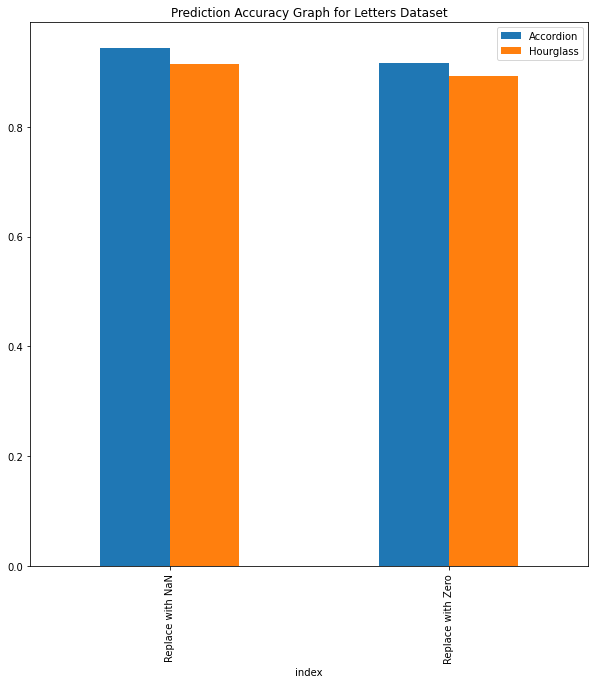

In [114]:
# plot grouped bar chart
# plt.figure(figsize=(10,10))
classification_result_df.plot(x='index',
        kind='bar',
        stacked=False,
        title='Prediction Accuracy Graph for Letters Dataset',
        figsize=(10,10));

In [111]:
res_trans = classification_result_df.transpose()
res_trans.columns=res_trans.iloc[0]
res_trans = res_trans.drop('index')
res_trans.reset_index(inplace=True)

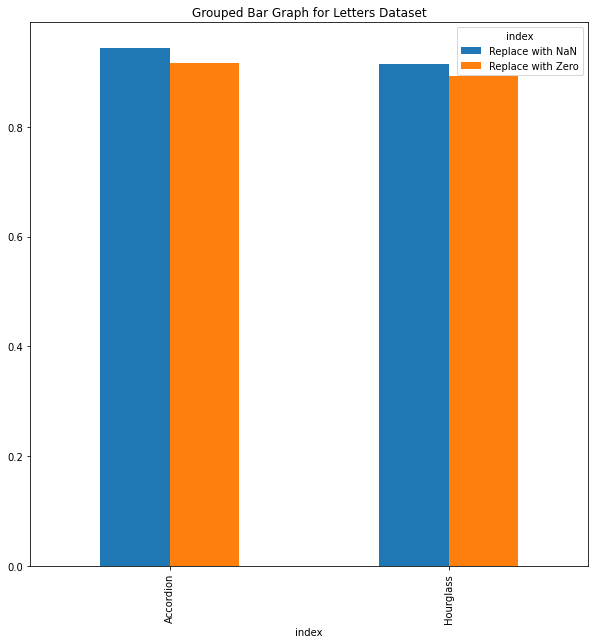

In [113]:
# plot grouped bar chart
# plt.figure(figsize=(10,10))
res_trans.plot(x='index',
        kind='bar',
        stacked=False,
        title='Prediction Accuracy Graph for Letters Dataset',
        figsize=(10,10));

# Caravan

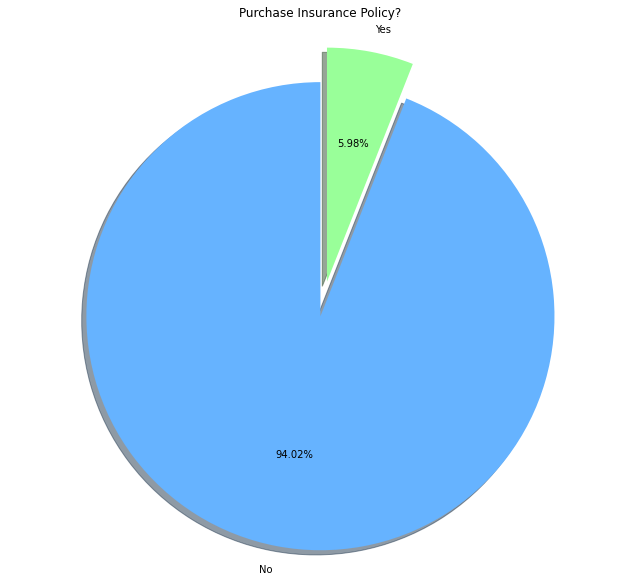

In [115]:
# "explode" the first and 2nd slice respectively
explode = (0.05, 0.1)

#add colors
colors = ['#66b3ff','#99ff99']

# pie chart
fig1, ax1 = plt.subplots(figsize = (9, 8))
ax1.pie(caravan['purchase'].value_counts(), explode=explode, 
        labels= caravan['purchase'].value_counts().index, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Purchase Insurance Policy?");
plt.show()

## Report DataFrame

In [116]:
classification_out_caravan = {'Accordion':[],'Hourglass':[]}

## Accordion MLP - Replacing with np.nan in every sample.

In [117]:
let_new = []
k = len(let.columns)

for i in range(1, k):
    ds_new = caravan.copy()
    ds_new.iloc[:, i] = np.nan
    let_new.append(ds_new)
    
let_new = pd.concat(let_new)

let_new.reset_index(inplace=True)

let_new.drop(columns='index', inplace=True)

In [118]:
let_new.sample(4)

,mostype,maanthui,mgemomv,mgemleef,moshoofd,mgodrk,mgodpr,mgodov,mgodge,mrelge,...,apersong,agezong,awaoreg,abrand,azeilpl,aplezier,afiets,ainboed,abystand,purchase
85069,39,1.0,2.0,4.0,9.0,0.0,4.0,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,No
59780,10,1.0,3.0,3.0,3.0,0.0,6.0,1.0,2.0,7.0,...,0,0,0,1,0,0,0,0,0,No
42719,1,1.0,3.0,4.0,1.0,0.0,5.0,2.0,NaN,9.0,...,0,0,0,0,0,0,0,0,0,No
39497,35,1.0,3.0,4.0,8.0,0.0,6.0,NaN,3.0,6.0,...,0,0,0,0,0,0,1,0,0,No


In [120]:
for col in let_new.columns[:-1]:
    let_new[col].fillna(int(let_new[col].mean()), inplace=True)
let_new.head(2)

,mostype,maanthui,mgemomv,mgemleef,moshoofd,mgodrk,mgodpr,mgodov,mgodge,mrelge,...,apersong,agezong,awaoreg,abrand,azeilpl,aplezier,afiets,ainboed,abystand,purchase
0,33,1.0,3.0,2.0,8.0,0.0,5.0,1.0,3.0,7.0,...,0,0,0,1,0,0,0,0,0,No
1,37,1.0,2.0,2.0,8.0,1.0,4.0,1.0,4.0,6.0,...,0,0,0,1,0,0,0,0,0,No


In [ ]:
# let_new.isna().sum()

In [121]:
let_y = let_new['purchase']
let_X = let_new.drop(columns = 'purchase')

In [122]:
y = let_y.copy()
X = let_X.copy()

# scale the data by standardization
X = StandardScaler().fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify = y 
    )

In [124]:
X_train.shape, X_test.shape 

((74521, 85), (18631, 85))

### Train MLP model

In [125]:
mlp_accordion = MLPClassifier(hidden_layer_sizes = (32,64,128,64,32,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_accordion

MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [126]:
mlp_accordion.fit(X_train, y_train)

Iteration 1, loss = 0.19530505
Iteration 2, loss = 0.11225709
Iteration 3, loss = 0.07207542
Iteration 4, loss = 0.05587258
Iteration 5, loss = 0.04550529
Iteration 6, loss = 0.04226998
Iteration 7, loss = 0.03807764
Iteration 8, loss = 0.03628374
Iteration 9, loss = 0.03586381
Iteration 10, loss = 0.03172585


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [127]:
pred_mlp = mlp_accordion.predict(X_test)

### Accuracy

In [128]:
mlp_accordion_pred = accuracy_score(pred_mlp, y_test)
mlp_accordion_pred

0.9831463689549675

In [129]:
classification_out_caravan['Accordion'].append(mlp_accordion_pred)

## MLP Hour-Glass

In [130]:
mlp_hr_glass = MLPClassifier(hidden_layer_sizes = (64,32,16,32,64,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_hr_glass

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [131]:
mlp_hr_glass.fit(X_train, y_train)

Iteration 1, loss = 0.20377502
Iteration 2, loss = 0.11311075
Iteration 3, loss = 0.07488758
Iteration 4, loss = 0.05663082
Iteration 5, loss = 0.04788699
Iteration 6, loss = 0.04184280
Iteration 7, loss = 0.03947573
Iteration 8, loss = 0.03843668
Iteration 9, loss = 0.03460301
Iteration 10, loss = 0.03376785


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [132]:
pred_mlp = mlp_hr_glass.predict(X_test)

### Accuracy

In [133]:
pred_mlp_hour_glass = accuracy_score(pred_mlp, y_test)
pred_mlp_hour_glass

0.9832537169234072

In [134]:
classification_out_caravan['Hourglass'].append(pred_mlp_hour_glass)

## Accordion MLP - Replacing with zero (0) vector in every sample.

In [135]:
let_new = []
k = len(let.columns)

for i in range(1, k):
    ds_new = caravan.copy()
    ds_new.iloc[:, i] = 0
    let_new.append(ds_new)
    
let_new = pd.concat(let_new)

let_new.reset_index(inplace=True)

let_new.drop(columns='index', inplace=True)

In [136]:
let_new.sample(4)

,mostype,maanthui,mgemomv,mgemleef,moshoofd,mgodrk,mgodpr,mgodov,mgodge,mrelge,...,apersong,agezong,awaoreg,abrand,azeilpl,aplezier,afiets,ainboed,abystand,purchase
13572,32,1,3,0,7,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No
1533,38,0,3,4,9,0,7,0,2,3,...,0,0,0,0,0,0,0,0,0,No
57785,35,1,3,3,8,0,5,1,3,6,...,0,0,0,0,0,0,0,0,0,No
26193,13,1,3,3,3,0,4,1,3,6,...,0,0,0,1,0,0,0,0,0,No


In [137]:
let_y = let_new['purchase']
let_X = let_new.drop(columns = 'purchase')

In [138]:
y = let_y.copy()
X = let_X.copy()

# scale the data by standardization
X = StandardScaler().fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify = y 
    )

In [140]:
X_train.shape, X_test.shape 

((74521, 85), (18631, 85))

### Train MLP model

In [141]:
mlp_accordion = MLPClassifier(hidden_layer_sizes = (32,64,128,64,32,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_accordion

MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [142]:
mlp_accordion.fit(X_train, y_train)

Iteration 1, loss = 0.20126423
Iteration 2, loss = 0.13889306
Iteration 3, loss = 0.09637858
Iteration 4, loss = 0.07074260
Iteration 5, loss = 0.05635555
Iteration 6, loss = 0.04942596
Iteration 7, loss = 0.04271200
Iteration 8, loss = 0.04019507
Iteration 9, loss = 0.03632940
Iteration 10, loss = 0.03378069


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [143]:
pred_mlp = mlp_accordion.predict(X_test)

### Accuracy

In [144]:
mlp_accordion_pred = accuracy_score(pred_mlp, y_test)
mlp_accordion_pred

0.9823412591916698

In [145]:
classification_out_caravan['Accordion'].append(mlp_accordion_pred)

## MLP Hour-Glass

In [146]:
mlp_hr_glass = MLPClassifier(hidden_layer_sizes = (64,32,16,32,64,), activation = 'relu' , 
                             random_state = 42, max_iter = 10, verbose = True)
mlp_hr_glass

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Training MLP

In [147]:
mlp_hr_glass.fit(X_train, y_train)

Iteration 1, loss = 0.20719619
Iteration 2, loss = 0.13019971
Iteration 3, loss = 0.09124310
Iteration 4, loss = 0.06881606
Iteration 5, loss = 0.05552382
Iteration 6, loss = 0.04795084
Iteration 7, loss = 0.04272750
Iteration 8, loss = 0.04053526
Iteration 9, loss = 0.03786466
Iteration 10, loss = 0.03511062


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16, 32, 64), max_iter=10,
              random_state=42, verbose=True)

### Testing MLP

In [148]:
pred_mlp = mlp_hr_glass.predict(X_test)

### Accuracy

In [149]:
pred_mlp_hour_glass = accuracy_score(pred_mlp, y_test)
pred_mlp_hour_glass

0.9802479738070957

In [150]:
classification_out_caravan['Hourglass'].append(pred_mlp_hour_glass)

## Aggregate Output

In [151]:
ind_ = ['Replace with NaN','Replace with Zero']

In [152]:
classification_out_caravan

{'Accordion': [0.9831463689549675, 0.9823412591916698],
 'Hourglass': [0.9832537169234072, 0.9802479738070957]}

In [154]:
classification_result_df  = pd.DataFrame(classification_out_caravan, index= ind_)
classification_result_df.reset_index(inplace=True)

In [155]:
classification_result_df

,index,Accordion,Hourglass
0,Replace with NaN,0.983146,0.983254
1,Replace with Zero,0.982341,0.980248


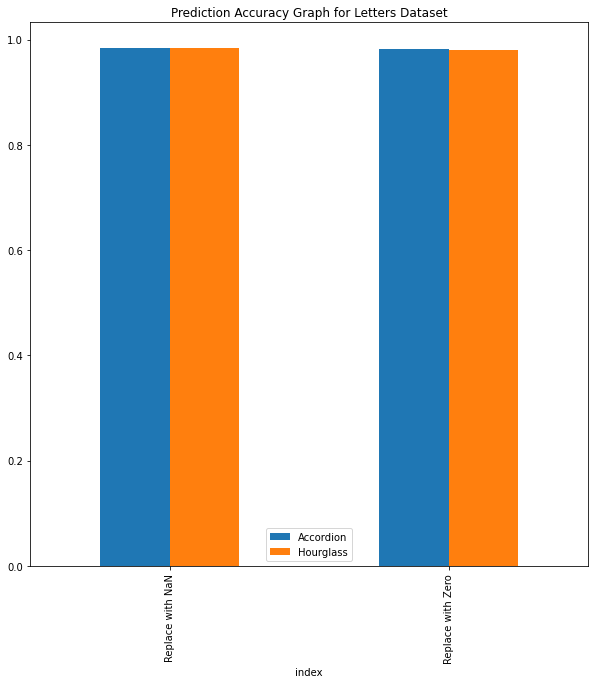

In [156]:
# plot grouped bar chart
# plt.figure(figsize=(10,10))
classification_result_df.plot(x='index',
        kind='bar',
        stacked=False,
        title='Prediction Accuracy Graph for Letters Dataset',
        figsize=(10,10));

In [157]:
res_trans = classification_result_df.transpose()
res_trans.columns=res_trans.iloc[0]
res_trans = res_trans.drop('index')
res_trans.reset_index(inplace=True)

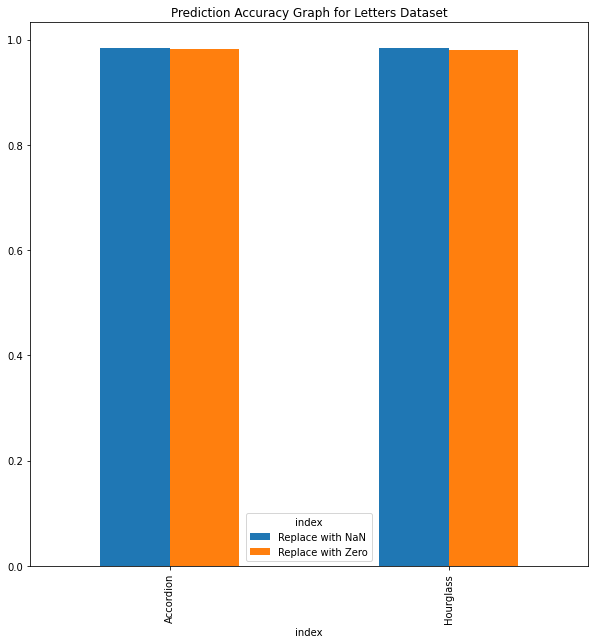

In [158]:
# plot grouped bar chart
# plt.figure(figsize=(10,10))
res_trans.plot(x='index',
        kind='bar',
        stacked=False,
        title='Prediction Accuracy Graph for Letters Dataset',
        figsize=(10,10));